In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_train=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\train.csv")
dataset_train.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
del dataset_train[dataset_train.columns[0]]
dataset_train.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [5]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [6]:
for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(dataset_train.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    dataset_train.loc[dataset_train[i]<Innerfence, i] = np.nan
    dataset_train.loc[dataset_train[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.1725005
Upperfence= 1.1541675
IQR =0.331667
atemp
Innerfence= -0.11368349999999999
Upperfence= 1.0480165000000001
IQR =0.290425
hum
Innerfence= 0.2327079999999998
Upperfence= 1.047708
IQR =0.2037500000000001
windspeed
Innerfence= -0.013655000000000056
Upperfence= 0.384313
IQR =0.09949200000000002
cnt
Innerfence= -1549.0
Upperfence= 8267.0
IQR =2454.0


In [7]:
dataset_train.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           2
windspeed     5
cnt           0
dtype: int64

In [8]:
dataset_train['hum'] = dataset_train['hum'].fillna(dataset_train['hum'].median())
dataset_train['windspeed'] = dataset_train['windspeed'].fillna(dataset_train['windspeed'].median())

In [9]:
dataset_train.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

temp


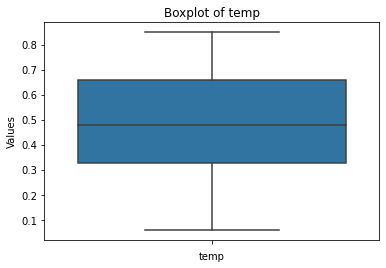

atemp


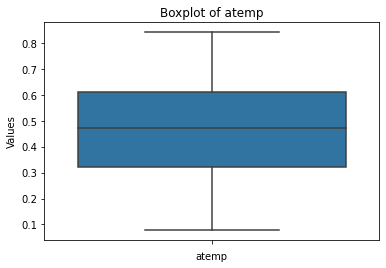

hum


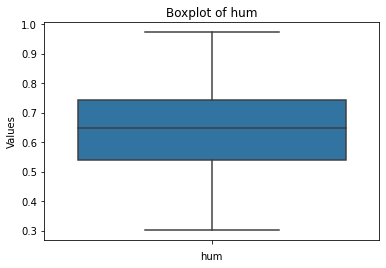

windspeed


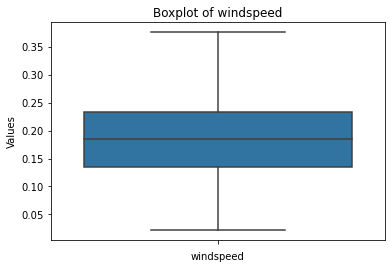

cnt


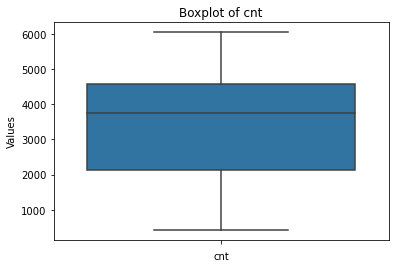

In [10]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = dataset_train[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

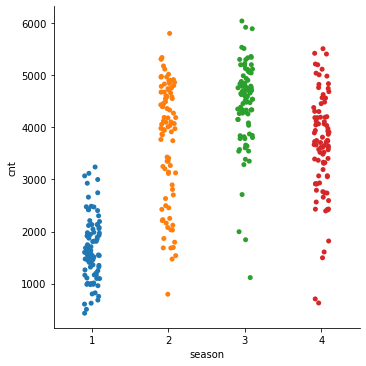

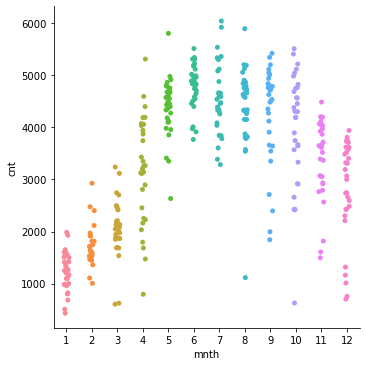

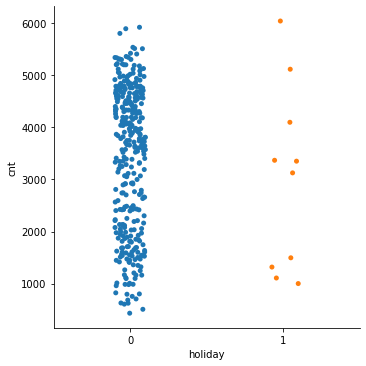

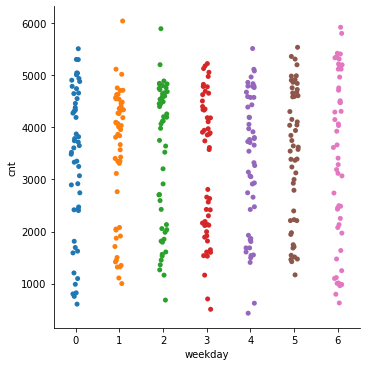

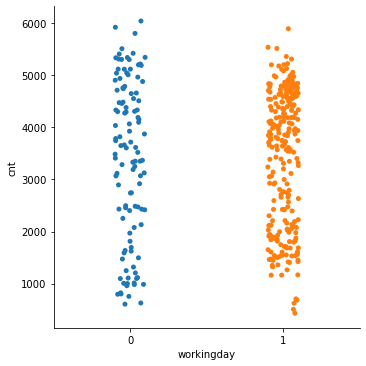

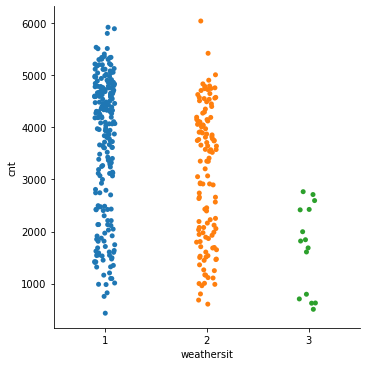

In [11]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", data=dataset_train)

temp


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


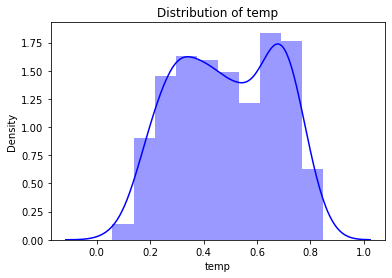

atemp


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


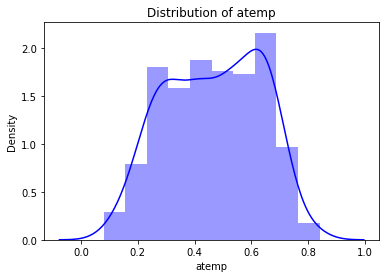

hum


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


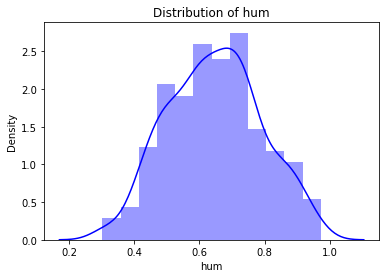

windspeed


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


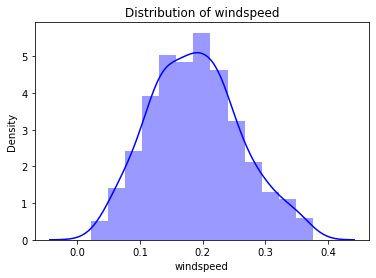

cnt


C:\Users\jonathan.sh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


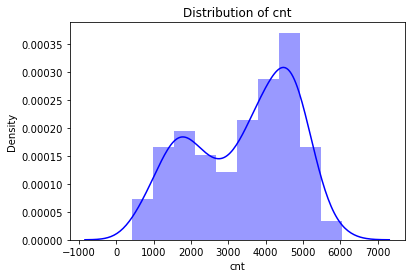

In [12]:
for i in numeric_var:
    print(i)
    sns.distplot(dataset_train[i], bins = 'auto', color = 'blue')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

In [37]:
dataset_train.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985.0
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801.0
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349.0
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562.0
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600.0


In [38]:
df = dataset_train.copy()
dataset_train = df.copy()

In [39]:
dataset_train = pd.get_dummies(dataset_train, columns = categorical_var) 

dataset_train.shape

(365, 35)

In [42]:
dataset_train.head()

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,mnth_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.363625,0.805833,0.160446,985.0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.353739,0.696087,0.248539,801.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.189405,0.437273,0.248309,1349.0,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.212122,0.590435,0.160296,1562.0,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.229270,0.436957,0.186900,1600.0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0


In [47]:
cols = dataset_train.columns.tolist()
cols

['temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'holiday_0',
 'holiday_1',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'workingday_0',
 'workingday_1',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3']

In [50]:
dataset_train=dataset_train[[
 'temp',
 'atemp',
 'hum',
 'windspeed',

 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'holiday_0',
 'holiday_1',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'workingday_0',
 'workingday_1',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
'cnt',
    
]]

In [51]:
dataset_train.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,cnt
0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,985.0
1,0.363478,0.353739,0.696087,0.248539,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,801.0
2,0.196364,0.189405,0.437273,0.248309,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1349.0
3,0.200000,0.212122,0.590435,0.160296,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1562.0
4,0.226957,0.229270,0.436957,0.186900,1,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,1600.0


In [52]:
X = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [54]:
len(X_train)

328

In [55]:
len(y_train)

328

In [56]:
len(X_test)

37

In [57]:
len(y_test)

37

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [60]:
linear_regression=LinearRegression()
model=linear_regression.fit(X_train,y_train)
Y_pred=model.predict(X_test)

In [61]:
print("training score : ", linear_regression.score(X_train, y_train))

training score :  0.8351269074473072


In [62]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("Testing score : ", score)

Testing score :  0.8653464727995905


In [63]:
dataset_test=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\test.csv")
dataset_test.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,366,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167
1,367,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665
2,368,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671
3,369,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700
4,370,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987


In [64]:
dataset_test = pd.get_dummies(dataset_test, columns = categorical_var) 

dataset_test.shape

(366, 35)

In [65]:
dataset_test.head()

,id,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,366,0.370000,0.375621,0.692500,0.192167,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,367,0.273043,0.252304,0.381304,0.329665,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,368,0.150000,0.126275,0.441250,0.365671,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
3,369,0.107500,0.119337,0.414583,0.184700,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,370,0.265833,0.278412,0.524167,0.129987,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [67]:
X2 = dataset_test.iloc[:, 1:].values

In [68]:
X2


array([[0.37, 0.38, 0.69, ..., 1.  , 0.  , 0.  ],
       [0.27, 0.25, 0.38, ..., 1.  , 0.  , 0.  ],
       [0.15, 0.13, 0.44, ..., 1.  , 0.  , 0.  ],
       ...,
       [0.25, 0.24, 0.75, ..., 0.  , 1.  , 0.  ],
       [0.26, 0.23, 0.48, ..., 1.  , 0.  , 0.  ],
       [0.22, 0.22, 0.58, ..., 0.  , 1.  , 0.  ]])

X2

In [69]:
len(X2)

366

In [70]:
y2_pred = regressor.predict(X2)
np.set_printoptions(precision=2)

In [71]:
y2_pred

array([1726.29, 1330.18, 1267.18, 1163.89, 1869.04, 2032.56, 2159.87,
       1935.09, 1272.04, 1796.32, 1163.84, 1473.01, 1524.33, 1596.11,
       1371.11, 1065.99, 1342.63, 1582.59, 1514.96, 1467.91,  732.1 ,
        656.66,  951.  , 1738.83, 1721.02, 1583.13, 1465.64, 1865.13,
       1884.6 , 1873.29, 2217.64, 2509.09, 1808.4 , 2077.59, 1365.77,
       1273.24, 1851.87, 2317.19, 1394.24, 1810.56, 1803.05, -269.37,
       1029.24, 1924.59, 1937.28, 2126.97, 1616.18, 1992.91, 2117.44,
       1413.04, 1472.54, 1887.92, 2130.03, 2395.82, 1717.05, 1715.94,
       1910.44, 2078.95, 2381.13, 1471.29, 2588.03, 2049.68, 2203.64,
       2078.47, 1988.26, 2217.81, 2270.43, 2447.33, 2111.87, 2347.42,
       2291.  , 2721.89, 2855.48, 3155.74, 2962.08, 2092.61, 2395.87,
       2044.85, 2700.63, 2767.17, 2748.29, 3036.47, 3132.3 , 2418.52,
       2075.51, 2761.8 , 3034.55, 3025.97, 3078.55, 2588.56, 2303.43,
       2939.03, 3361.95, 4021.47, 3952.82, 3708.43, 3515.68, 3783.48,
       3892.16, 3705

In [72]:
submission=pd.read_csv("C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\sample_submission.csv")
submission.head()

,id,cnt
0,366,2324.704634
1,367,1825.998871
2,368,1246.661929
3,369,1067.359745
4,370,2349.727614


In [73]:
df=pd.DataFrame(submission)


In [74]:
df['cnt']=y2_pred

In [75]:
df

,id,cnt
0,366,1726.294034
1,367,1330.176312
2,368,1267.180081
3,369,1163.885840
4,370,1869.040455
...,...,...
361,727,1435.332551
362,728,1911.350985
363,729,1677.101598
364,730,1826.220845


In [76]:
print(df.to_string(index=False))

  id          cnt
 366  1726.294034
 367  1330.176312
 368  1267.180081
 369  1163.885840
 370  1869.040455
 371  2032.558235
 372  2159.867693
 373  1935.090700
 374  1272.038367
 375  1796.323336
 376  1163.837092
 377  1473.012690
 378  1524.331233
 379  1596.113730
 380  1371.111180
 381  1065.992563
 382  1342.625782
 383  1582.589374
 384  1514.955750
 385  1467.909943
 386   732.102308
 387   656.661735
 388   950.998663
 389  1738.832943
 390  1721.022367
 391  1583.129432
 392  1465.642253
 393  1865.130840
 394  1884.596992
 395  1873.286866
 396  2217.635898
 397  2509.085619
 398  1808.399106
 399  2077.592034
 400  1365.774104
 401  1273.243718
 402  1851.866972
 403  2317.194415
 404  1394.238302
 405  1810.556959
 406  1803.053316
 407  -269.374878
 408  1029.236024
 409  1924.590646
 410  1937.277529
 411  2126.972757
 412  1616.184451
 413  1992.906454
 414  2117.440139
 415  1413.036124
 416  1472.538903
 417  1887.923683
 418  2130.031200
 419  2395.824435
 420  1717

In [77]:
df.to_csv('C:\\Users\\jonathan.sh\\OneDrive - Webpals\\DS Course\\Task DS\\Proccessed.csv',index=False)